In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Dense, LeakyReLU

In [33]:
df = pd.read_csv("/Users/jordandavis/Documents/GitHub/Project1DS675/Battery_RUL.csv")

In [8]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [10]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


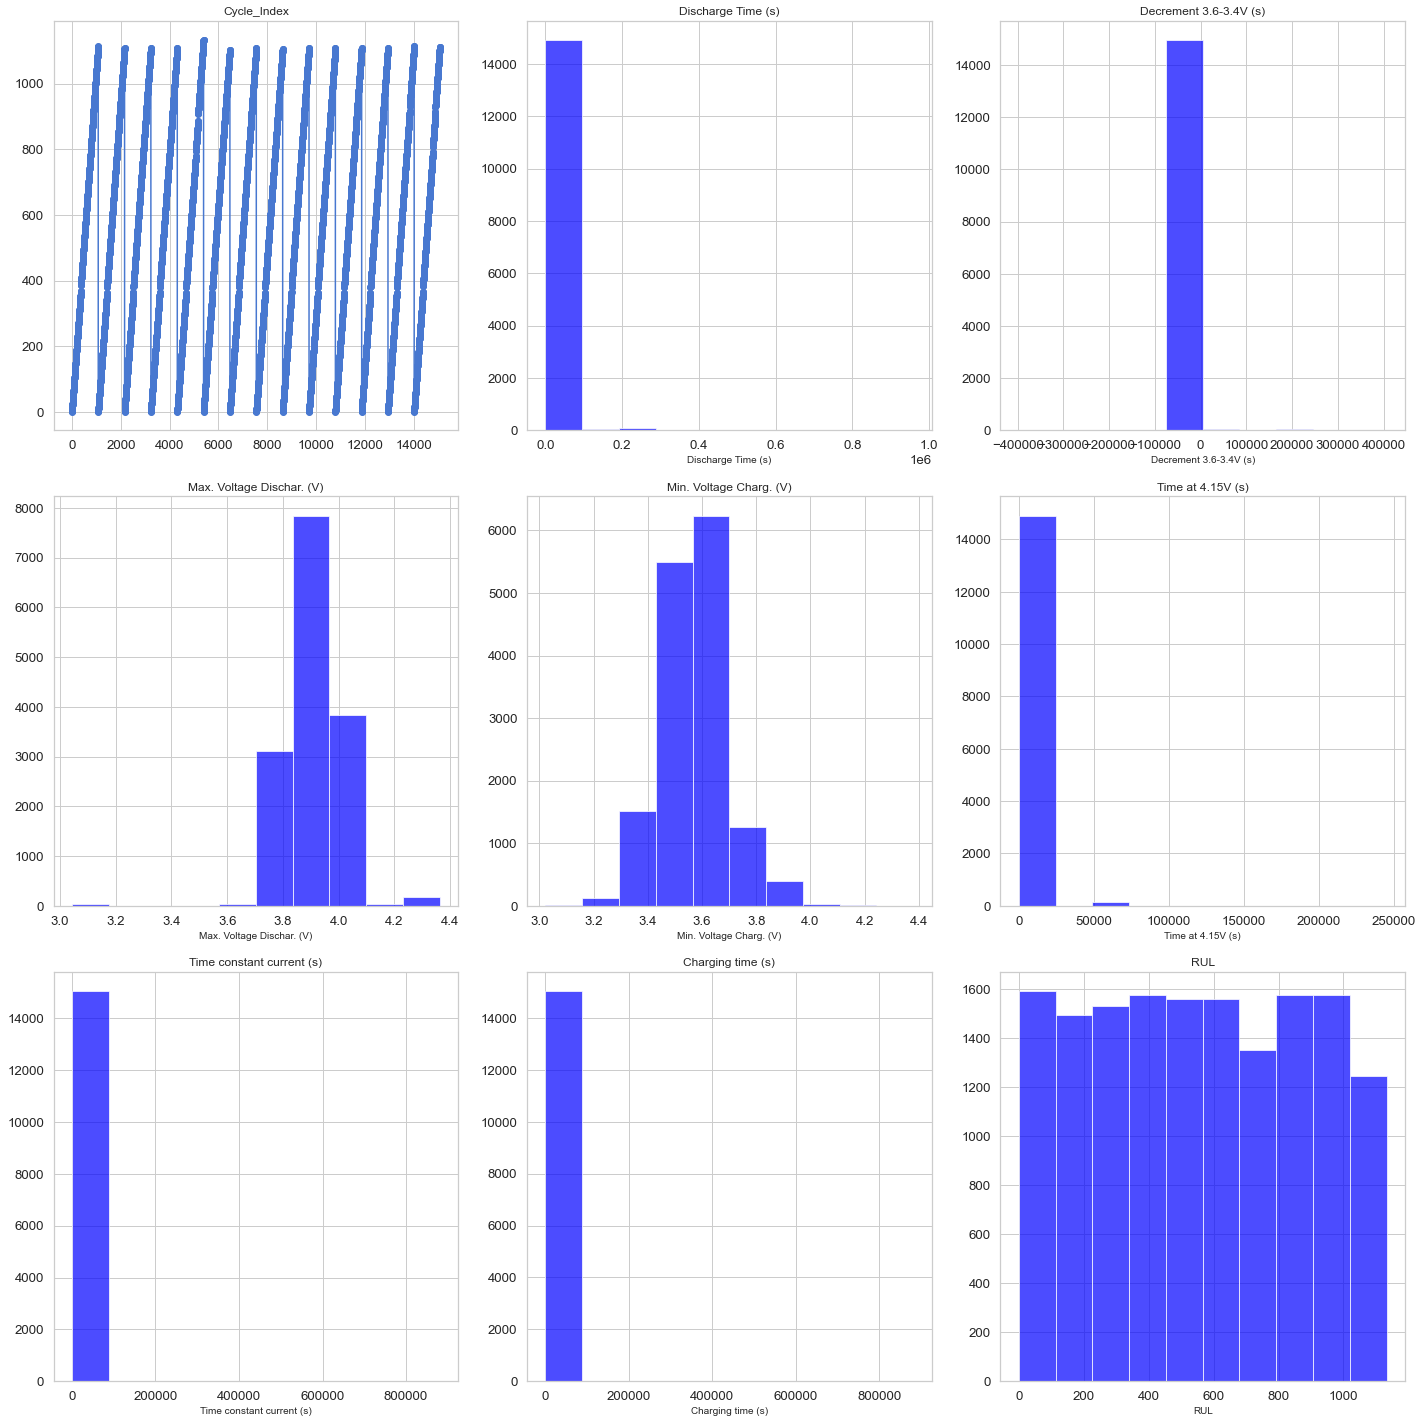

In [19]:
numlist = df.columns
fig = plt.figure(figsize=(20, 20))
for i in range(len(numlist)):
    plt.subplot(3, 3, i + 1)  # Adjust subplot layout if needed
    plt.title(numlist[i], fontsize=12)
    if numlist[i] == "Cycle_Index":  # Ensure a meaningful plot for Cycle_Index
        plt.plot(df[numlist[i]], label=numlist[i], marker='o')
    else:
        plt.hist(df[numlist[i]], bins=10, color='blue', alpha=0.7)
        plt.xlabel(numlist[i], fontsize=10)
    plt.tight_layout()

plt.show()

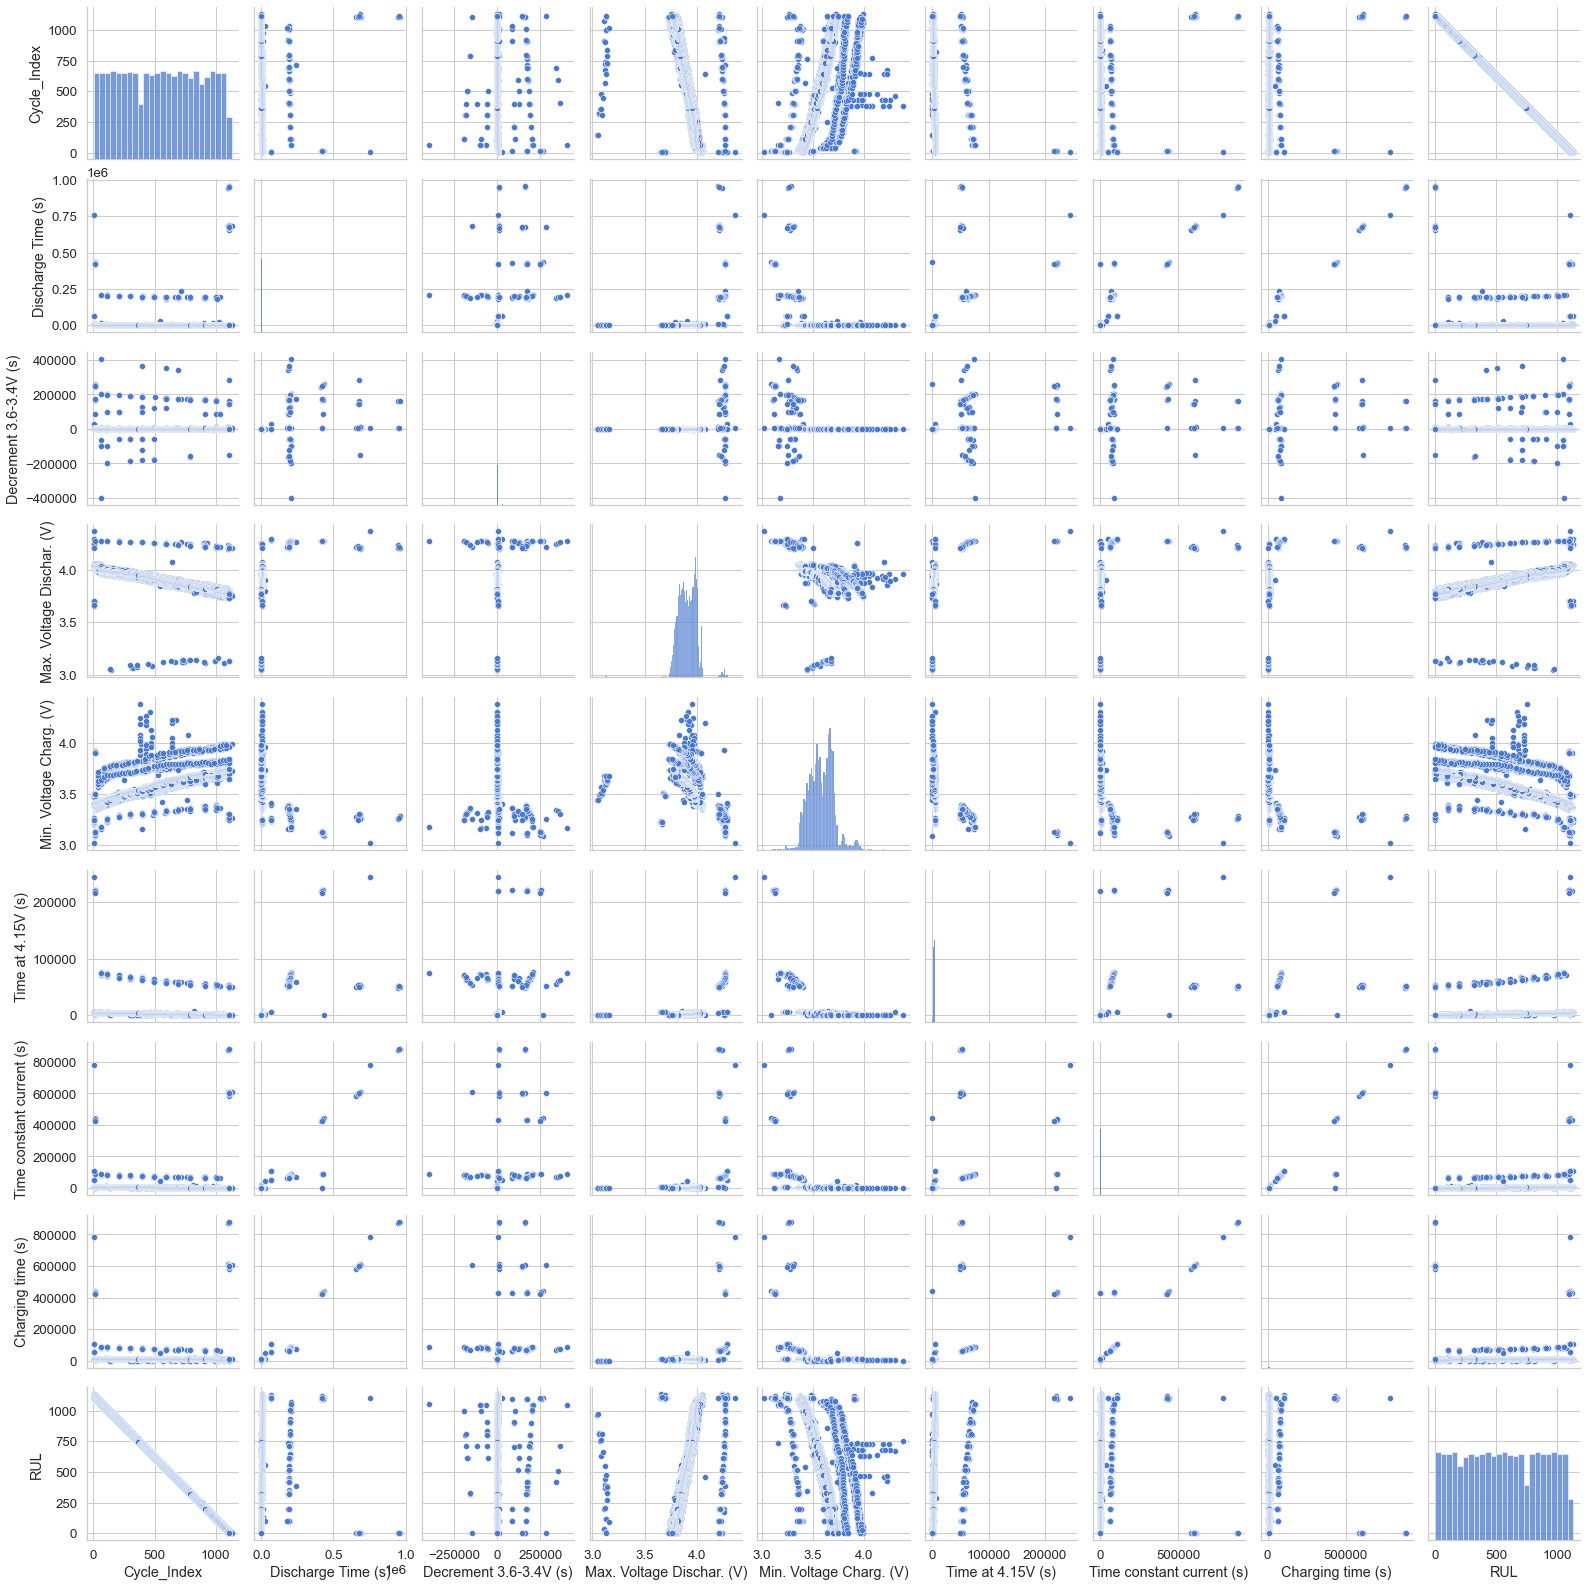

In [21]:
sns.pairplot(df)

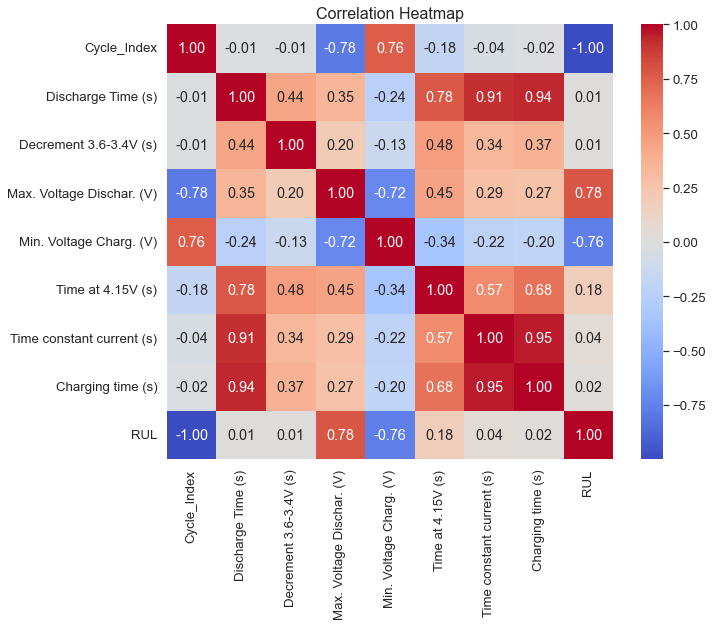

In [22]:
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Feature Importance:
                      Feature  Importance
0                Cycle_Index    0.619734
4    Min. Voltage Charg. (V)    0.087469
3  Max. Voltage Dischar. (V)    0.081798
5          Time at 4.15V (s)    0.074485
2     Decrement 3.6-3.4V (s)    0.050178
6  Time constant current (s)    0.047795
7          Charging time (s)    0.020254
1         Discharge Time (s)    0.018286


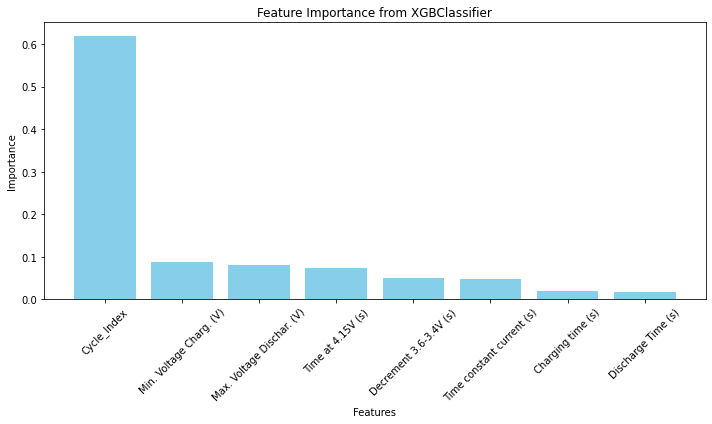

In [3]:
X = df.drop(columns=['RUL'])  # Features
y = df['RUL'] 
y = LabelEncoder().fit_transform(y > 1111)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the XGBClassifier
model = XGBClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importance = model.feature_importances_

# Create a DataFrame for better visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance from XGBClassifier')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
input_features = df.drop(columns=['Discharge Time (s)','Charging time (s)','Cycle_Index','RUL'])
output_features = df['RUL']
X_train, X_test, y_train, y_test = train_test_split(input_features, output_features, test_size=0.2, random_state=42,shuffle = True)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Coefficients and Intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Mean Squared Error (MSE): 32372.035853810146
R-squared (R²): 0.6874852068722123
Model Coefficients: [-1.37134941e-03  2.17419661e+03 -1.08418052e+03 -5.61791582e-03
 -1.69651694e-03]
Model Intercept: -4032.6810982424113


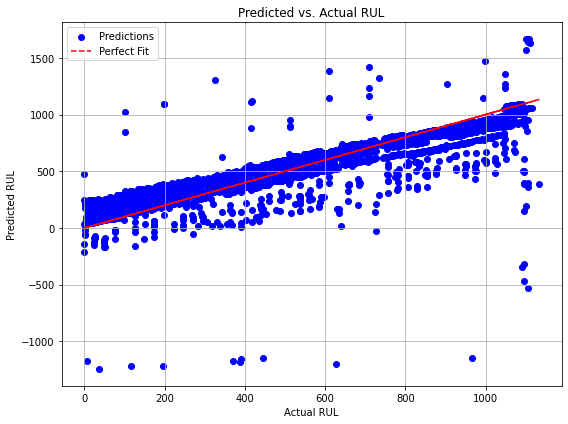

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit')  # Reference line
plt.title('Predicted vs. Actual RUL')
plt.xlabel('Actual RUL')
plt.ylabel('Predicted RUL')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [31]:
train_score = model.score(X_train, y_train)
print("Score on Training Set: {:.2%}".format(train_score))
test_score = model.score(X_test, y_test)
print("Score on Test Set: {:.2%}".format(test_score))

Score on Training Set: 76.25%
Score on Test Set: 68.75%


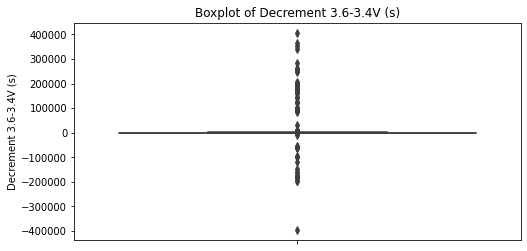

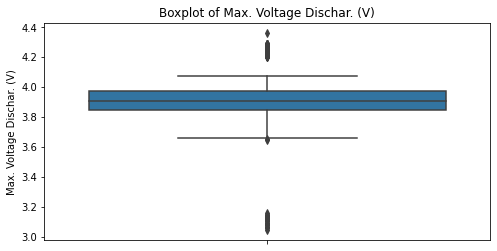

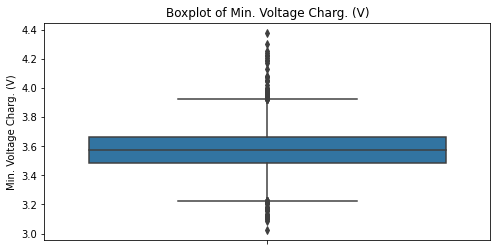

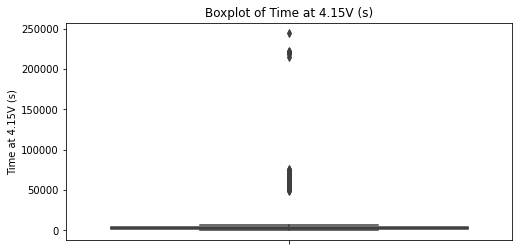

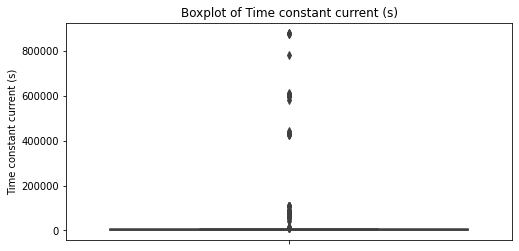

In [38]:
for col in input_features.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

In [53]:
input_features = df.drop(columns=['Discharge Time (s)', 'Charging time (s)', 'Cycle_Index', 'RUL'])
output_features = df['RUL']

X_train, X_test, y_train, y_test = train_test_split(input_features, output_features, test_size=0.2, random_state=42, shuffle=True)

# Calculate IQR for training data only
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the training data
X_train_cleaned = X_train[~((X_train < lower_bound) | (X_train > upper_bound)).any(axis=1)]
y_train_cleaned = y_train.loc[X_train_cleaned.index]

# Initialize and train the Linear Regression model on cleaned training data
model = LinearRegression()
model.fit(X_train_cleaned, y_train_cleaned)

# Evaluate the model on the original test set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train_cleaned)

# Calculate evaluation metrics
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Evaluation on Original Test Set:")
print("Mean Squared Error (MSE):", mse_test)
print("R-squared (R²):", r2_test)

# Optional: Evaluate performance on the cleaned training data for comparison
mse_train = mean_squared_error(y_train_cleaned, y_train_pred)
r2_train = r2_score(y_train_cleaned, y_train_pred)

print("\nEvaluation on Cleaned Training Data:")
print("Mean Squared Error (MSE):", mse_train)
print("R-squared (R²):", r2_train)

# Coefficients and Intercept
print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Evaluation on Original Test Set:
Mean Squared Error (MSE): 10118857.575003488
R-squared (R²): -96.68593782678532

Evaluation on Cleaned Training Data:
Mean Squared Error (MSE): 2941.717943051358
R-squared (R²): 0.9710078945824162

Model Coefficients: [1.98896981e-02 7.99521210e+02 2.16942168e+02 1.90339675e-01
 3.18130633e-02]
Model Intercept: -4040.974399610571


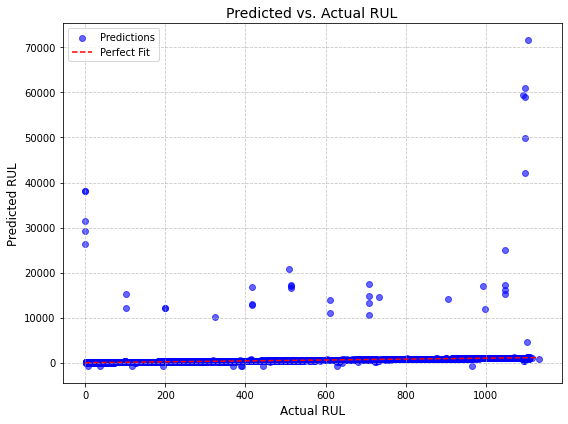

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')  # Reference line
plt.title('Predicted vs. Actual RUL', fontsize=14)
plt.xlabel('Actual RUL', fontsize=12)
plt.ylabel('Predicted RUL', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [57]:

Q1 = input_features.quantile(0.25)
Q3 = input_features.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
input_features_cleaned = input_features[~((input_features < lower_bound) | (input_features > upper_bound)).any(axis=1)]
output_features_cleaned = output_features[input_features_cleaned.index]

# Filter the training and testing indices to align with cleaned input features
X_train_cleaned = X_train.loc[X_train.index.intersection(input_features_cleaned.index)]
X_test_cleaned = X_test.loc[X_test.index.intersection(input_features_cleaned.index)]

# Adjust the corresponding outputs to match the filtered inputs
y_train_cleaned = y_train.loc[X_train_cleaned.index]
y_test_cleaned = y_test.loc[X_test_cleaned.index]

# Initialize and train the Linear Regression model
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

# Make predictions on the test set
y_test_pred_cleaned = model_cleaned.predict(X_test_cleaned)

# Evaluate performance
mse_cleaned = mean_squared_error(y_test_cleaned, y_test_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_test_pred_cleaned)

print("Cleaned Data:")
print("Mean Squared Error (MSE):", mse_cleaned)
print("R-squared (R²):", r2_cleaned)

# Coefficients and Intercept
print("Model Coefficients:", model_cleaned.coef_)
print("Model Intercept:", model_cleaned.intercept_)

# Coefficients and Intercept
print("Model Coefficients:", model_cleaned.coef_)
print("Model Intercept:", model_cleaned.intercept_)

Cleaned Data:
Mean Squared Error (MSE): 3365.0993882057464
R-squared (R²): 0.9667568553661537
Model Coefficients: [1.99142975e-02 7.99515741e+02 2.16944130e+02 1.90336613e-01
 3.18133238e-02]
Model Intercept: -4040.9633043709564
Model Coefficients: [1.99142975e-02 7.99515741e+02 2.16944130e+02 1.90336613e-01
 3.18133238e-02]
Model Intercept: -4040.9633043709564


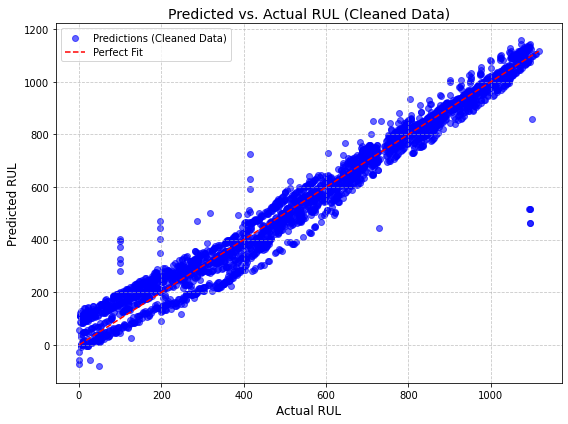

In [58]:
# Plot the cleaned data's predictions vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cleaned, y_test_pred_cleaned, color='blue', label='Predictions (Cleaned Data)', alpha=0.6)
plt.plot([y_test_cleaned.min(), y_test_cleaned.max()], 
         [y_test_cleaned.min(), y_test_cleaned.max()], 
         color='red', linestyle='--', label='Perfect Fit')  # Reference line
plt.title('Predicted vs. Actual RUL (Cleaned Data)', fontsize=14)
plt.xlabel('Actual RUL', fontsize=12)
plt.ylabel('Predicted RUL', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


/Users/jordandavis/miniconda3/envs/ml4md/lib/python3.8/site-packages/keras/src/engine/data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
302/302 [==============================] - 2s 4ms/step - loss: 348767.0312 - mae: 504.4505 - val_loss: 173594.8281 - val_mae: 357.5237
Epoch 2/50
302/302 [==============================] - 1s 3ms/step - loss: 55148.1133 - mae: 169.2198 - val_loss: 42650.8281 - val_mae: 103.1937
Epoch 3/50
302/302 [==============================] - 1s 4ms/step - loss: 18925.5215 - mae: 87.4760 - val_loss: 30966.8223 - val_mae: 93.8947
Epoch 4/50
302/302 [==============================] - 1s 3ms/step - loss: 15216.3564 - mae: 82.9184 - val_loss: 26128.0176 - val_mae: 88.9995
Epoch 5/50
302/302 [==============================] - 1s 3ms/step - loss: 13555.0361 - mae: 80.1524 - val_loss: 22189.9023 - val_mae: 86.2729
Epoch 6/50
302/302 [==============================] - 1s 4ms/step - loss: 12648.0850 - mae: 78.4054 - val_loss: 20223.3965 - val_mae: 84.0620
Epoch 7/50
302/302 [==============================] - 1s 4ms/step - loss: 12005.1455 - mae: 77.0672 - val_loss: 18688.1270 - val_mae: 83.2447


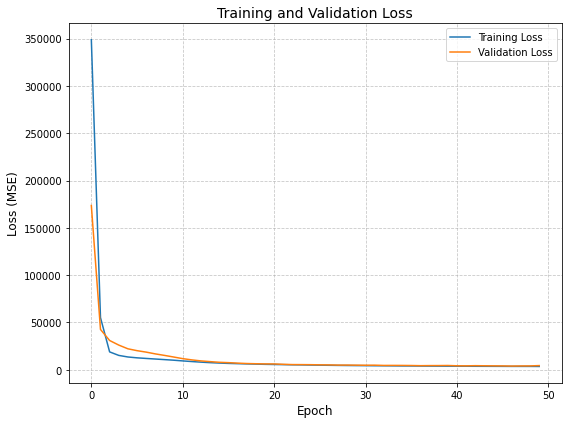

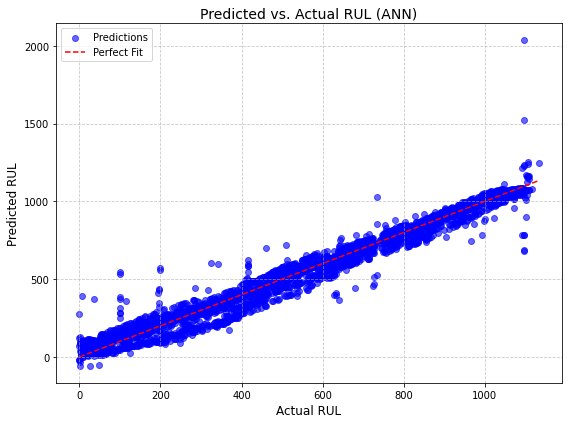

In [62]:
X_train, X_test, y_train, y_test = train_test_split(input_features, output_features, test_size=0.2, random_state=42, shuffle=True)

# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Single output for RUL prediction
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_test_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("ANN Performance on Original Data:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot predicted vs. actual RUL
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Predicted vs. Actual RUL (ANN)', fontsize=14)
plt.xlabel('Actual RUL', fontsize=12)
plt.ylabel('Predicted RUL', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

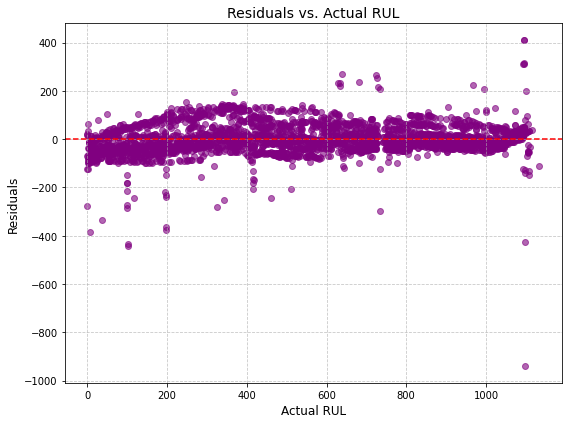

In [63]:
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.6, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Actual RUL', fontsize=14)
plt.xlabel('Actual RUL', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/Users/jordandavis/miniconda3/envs/ml4md/lib/python3.8/site-packages/keras/src/engine/data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
302/302 [==============================] - 7s 14ms/step - loss: 248266.6719 - mae: 410.6936 - val_loss: 57461.9258 - val_mae: 146.9308
Epoch 2/50
302/302 [==============================] - 1s 3ms/step - loss: 22425.6191 - mae: 92.2397 - val_loss: 26302.0996 - val_mae: 94.3040
Epoch 3/50
302/302 [==============================] - 2s 6ms/step - loss: 16906.0879 - mae: 84.7885 - val_loss: 22788.3359 - val_mae: 91.2903
Epoch 4/50
302/302 [==============================] - 1s 4ms/step - loss: 15468.0137 - mae: 82.6945 - val_loss: 21076.8105 - val_mae: 87.7923
Epoch 5/50
302/302 [==============================] - 1s 5ms/step - loss: 14507.0752 - mae: 80.3572 - val_loss: 19621.5469 - val_mae: 86.6231
Epoch 6/50
302/302 [==============================] - 1s 4ms/step - loss: 13788.6836 - mae: 78.9593 - val_loss: 18327.5605 - val_mae: 84.2574
Epoch 7/50
302/302 [==============================] - 1s 4ms/step - loss: 13016.1240 - mae: 77.3764 - val_loss: 16866.4219 - val_mae: 83.9716
Ep

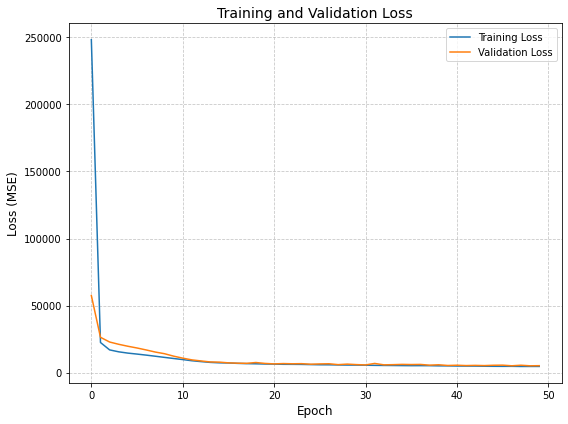

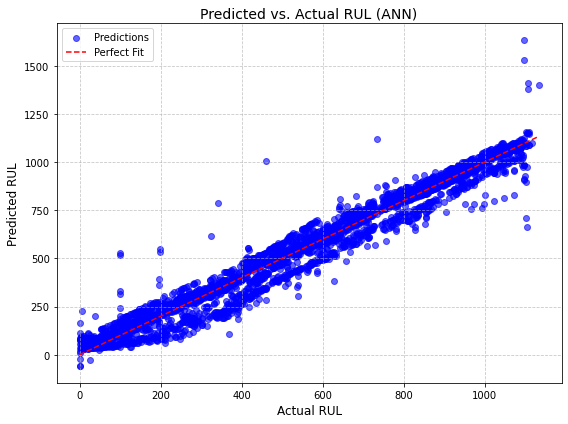

In [75]:


X_train, X_test, y_train, y_test = train_test_split(input_features, output_features, test_size=0.2, random_state=42, shuffle=True)


# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the ANN model
model = Sequential([
    Dense(128, activation='LeakyReLU', input_dim=input_features.shape[1]),
    Dense(64, activation='LeakyReLU'),
    Dense(1)  # Output layer
])
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_test_pred = model.predict(X_test_scaled).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("ANN Performance on Original Data:")
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

# Plot training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot predicted vs. actual RUL
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', label='Predictions', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')
plt.title('Predicted vs. Actual RUL (ANN)', fontsize=14)
plt.xlabel('Actual RUL', fontsize=12)
plt.ylabel('Predicted RUL', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()